In [1]:
import pandas as pd
import numpy as np
#import prospr as pr
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import seaborn as sns
import random
import csv
from collections import Counter
import itertools
import math
import ast


In [2]:
Bondsdf = pd.read_json("Bonds.json")
BondsdFFA = pd.read_json("Bonds_FFA.json")

In [3]:
for i in range(0, len(Bondsdf)):
    Bondsdf.loc[i, 'length'] = 20 + (20 * (( i - (i % 5)) / 5))
for i in range(0, len(BondsdFFA)):
    BondsdFFA.loc[i, 'length'] = 20 + (20 * (( i - (i % 5)) / 5))

In [4]:
Bondsdf = Bondsdf.rename(columns={0: "Final Protein", 1: "Fold", 2: "Fitness", 3: "Data"})
BondsdFFA = BondsdFFA.rename(columns={0: "Final Protein", 1: "Fold", 2: "Fitness", 3: "Data"})

In [5]:
dataFrames = []

for i in range(len(Bondsdf)):
    # Access the data list for each entry
    data = Bondsdf["Data"][i]
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['Iteration', 'Fitness'])


    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['Fitness'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
Bonds_Data = pd.concat(dataFrames, ignore_index=True)

In [6]:
dataFrames = []

for i in range(len(BondsdFFA)):
    # Access the data list for each entry
    data = BondsdFFA["Data"][i]
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['Iteration', 'Current', 'Fitness'])

    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['Fitness'].ffill(inplace=True)
    df['Current'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
BondsFFA_Data = pd.concat(dataFrames, ignore_index=True)

In [7]:
AvgBondsFFA_Data = BondsFFA_Data.groupby(['Iteration', 'length'], as_index=False).agg({'Fitness':'mean', 'Current':'mean'})
AvgBonds_Data = Bonds_Data.groupby(['Iteration', 'length'], as_index=False)['Fitness'].mean()

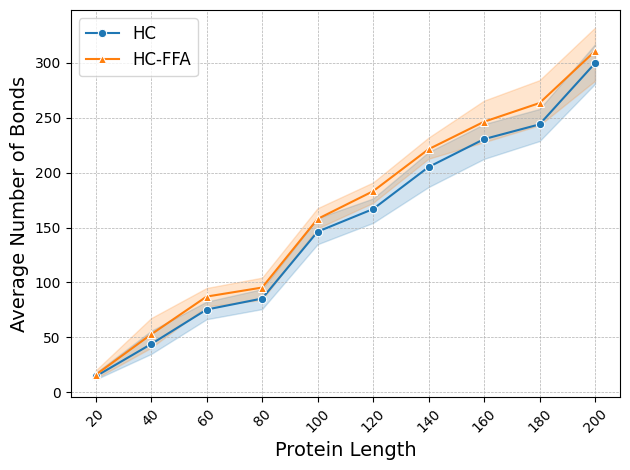

In [8]:

# Create line plots for current and best solutions
#sns.lineplot(x='Iteration', y='Current Solution', data=df)
sns.lineplot(x='length', y='Fitness', data=Bondsdf, label="HC", marker="o", linestyle="-", color="#1f77b4")
sns.lineplot(x='length', y='Fitness', data=BondsdFFA, label="HC-FFA", marker="^", linestyle="-", color="#ff7f0e")

# Set labels and title
plt.xlabel('Protein Length', fontsize=14)
plt.ylabel('Average Number of Bonds', fontsize=14)

plt.legend(loc="upper left", prop={"size": 12})
#plt.xscale('log')
#plt.title('Bonds after 100.000 iterations per length', fontsize=14)

plt.xticks(rotation=45)
plt.xticks(range(20,201,20))


# Use a more professional font
plt.rcParams["font.family"] = "Times New Roman"

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

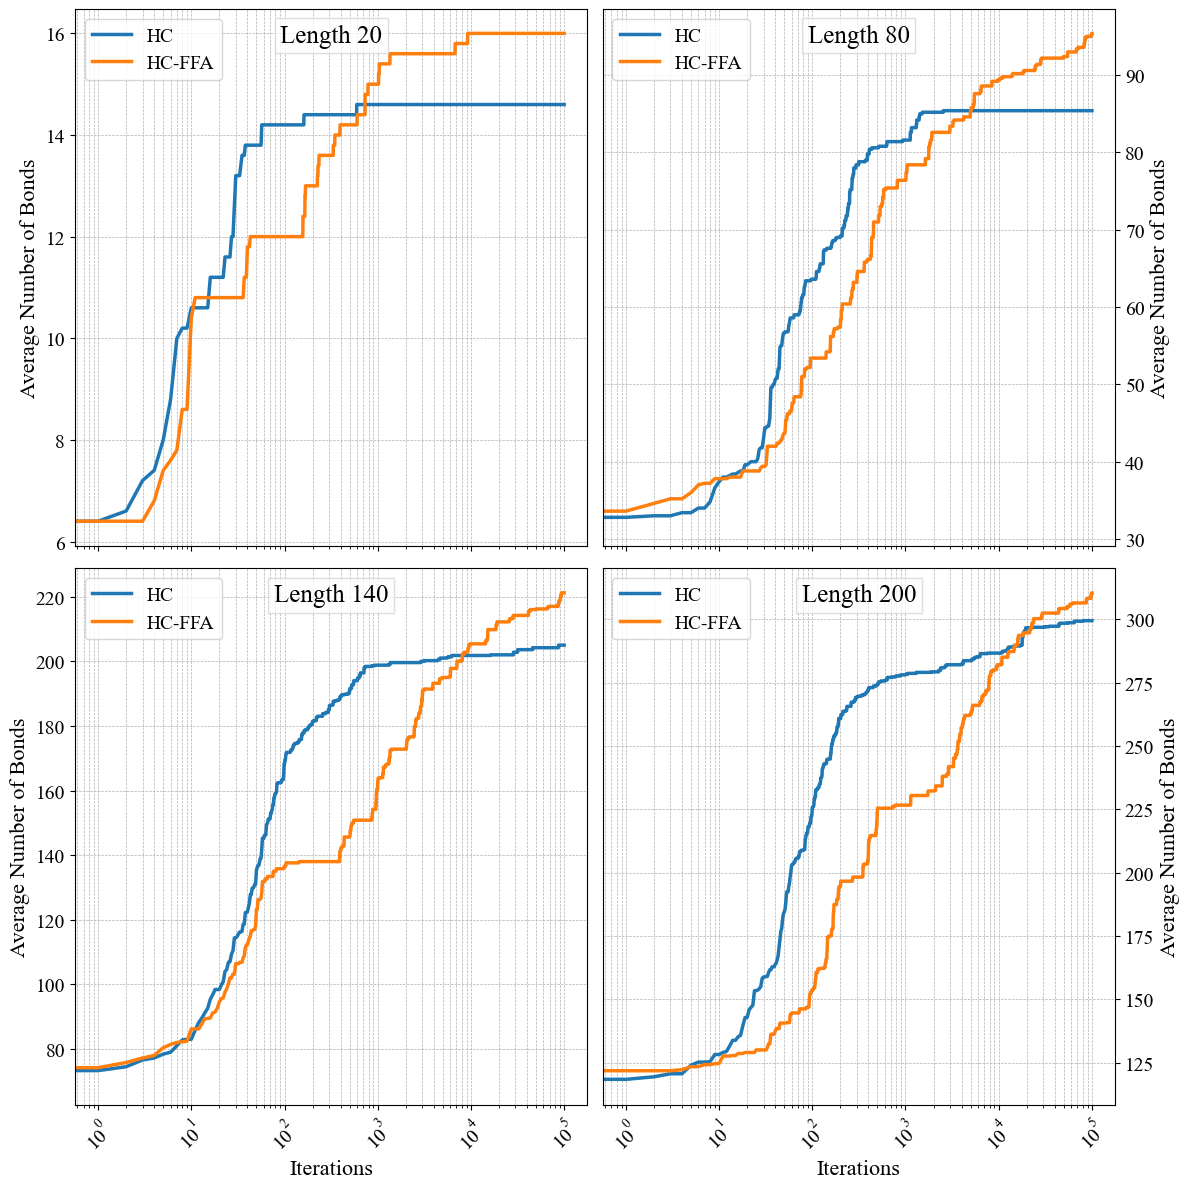

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


lengths = [20, 80, 140, 200]

# Increase figure size
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Add a figure title
#fig.suptitle('Bonds over iterations', fontsize=16)

for i, length in enumerate(lengths):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Iteration', y='Fitness', data=AvgBonds_Data[AvgBonds_Data['length'] == length], label='HC', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='Fitness', data=AvgBondsFFA_Data[AvgBondsFFA_Data['length'] == length], label='HC-FFA', linestyle="-", ax=axs[row, col], linewidth=2.5)

    axs[row, col].set_ylabel('Average Number of Bonds', fontsize=16)
    axs[row, col].legend(loc="upper left", prop={"size": 14})
    axs[row, col].set_xscale('log')
    axs[row, col].text(0.5, 0.95, f'Length {length}', fontsize=18, ha='center', va='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='white', alpha=0.75, edgecolor='lightgrey'))
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axs[row, col].tick_params(axis='y', labelsize=14) 
    axs[row, col].grid(True, which="both", linestyle="--", linewidth=0.5)

    # Remove x-axis label and values for the top graphs
    if row == 0:
        axs[row, col].set_xlabel('')
        axs[row, col].set_xticklabels([])
    else:
        axs[row, col].set_xlabel('Iterations', fontsize=16)

    # Move y-axis to right for the right graphs
    if col == 1:
        axs[row, col].yaxis.tick_right()
        axs[row, col].yaxis.set_label_position("right")

plt.tight_layout()
plt.show()
